In [51]:
# conda install -c conda-forge xgboost

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

train_merge = pd.read_csv('../data/train_merge.csv')

In [53]:
ytrain = train_merge['country_destination']

xtrain = train_merge.drop(columns=['country_destination'])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
xtrain['gender'] = label_encoder.fit_transform(xtrain['gender'])
xtrain['signup_method'] = label_encoder.fit_transform(xtrain['signup_method'])
xtrain['language'] = label_encoder.fit_transform(xtrain['language'])
xtrain['affiliate_channel'] = label_encoder.fit_transform(xtrain['affiliate_channel'])
xtrain['affiliate_provider'] = label_encoder.fit_transform(xtrain['affiliate_provider'])
xtrain['first_affiliate_tracked'] = label_encoder.fit_transform(xtrain['first_affiliate_tracked'])
xtrain['signup_app'] = label_encoder.fit_transform(xtrain['signup_app'])
xtrain['first_device_type'] = label_encoder.fit_transform(xtrain['first_device_type'])
xtrain['first_browser'] = label_encoder.fit_transform(xtrain['first_browser'])

xtrain['most_frequent_action'] = label_encoder.fit_transform(xtrain['most_frequent_action'])
xtrain['most_frequent_action_type'] = label_encoder.fit_transform(xtrain['most_frequent_action_type'])
xtrain['most_frequent_action_detail'] = label_encoder.fit_transform(xtrain['most_frequent_action_detail'])
xtrain['most_frequent_device_type'] = label_encoder.fit_transform(xtrain['most_frequent_device_type'])

xtrain['affiliate_provider'] = label_encoder.fit_transform(xtrain['affiliate_provider'])
xtrain['first_affiliate_tracked'] = label_encoder.fit_transform(xtrain['first_affiliate_tracked'])

# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [55]:
xtrain = xtrain.drop(['date_account_created','timestamp_first_active','date_first_booking'], axis=1)

In [56]:
xtrain.dtypes

gender                           int32
age                              int64
signup_method                    int32
signup_flow                      int64
language                         int32
affiliate_channel                int32
affiliate_provider               int64
first_affiliate_tracked          int64
signup_app                       int32
first_device_type                int32
first_browser                    int32
most_frequent_action             int32
most_frequent_action_type        int32
most_frequent_action_detail      int32
most_frequent_device_type        int32
most_frequent_secs_elapsed     float64
dtype: object

In [57]:
ytrain

0        other
1           US
2        other
3          NDF
4           US
         ...  
40790       ES
40791       US
40792       US
40793      NDF
40794      NDF
Name: country_destination, Length: 40795, dtype: object

In [58]:
xtrain

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,most_frequent_action,most_frequent_action_type,most_frequent_action_detail,most_frequent_device_type,most_frequent_secs_elapsed
0,2,62,0,0,5,6,7,3,2,6,6,114,3,75,8,2.0
1,1,32,1,0,5,7,7,0,2,7,17,22,4,14,10,0.0
2,0,19,0,0,5,5,7,6,2,3,23,87,3,75,6,37.0
3,2,25,0,0,5,2,3,6,2,3,6,114,2,75,6,149.0
4,1,32,1,0,5,2,3,6,2,7,17,22,6,0,11,387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40790,1,34,0,0,5,2,3,0,2,3,6,110,7,73,6,1.0
40791,1,36,0,0,5,5,7,0,2,3,23,114,7,73,6,78.0
40792,1,23,0,0,5,5,7,3,2,6,11,110,3,73,8,29.0
40793,2,32,0,0,5,5,7,3,2,3,23,110,7,0,6,584.0


In [59]:
ytrain_le = LabelEncoder().fit_transform(ytrain.values.ravel())
ytrain_new = ytrain_le       # Encode label

X_scaler = StandardScaler()
xtrain_new = X_scaler.fit_transform(xtrain)  # Normalization

In [60]:
pd.DataFrame(xtrain_new).to_csv("../data/Airbnb_xtrain_v5.csv")
pd.DataFrame(ytrain_new).to_csv("../data/Airbnb_ytrain_v5.csv")

In [61]:
NUM_XGB = 16

params = {'num_class': 12,
          'eta':0.1,
          'objective':'multi:softprob'}
train_xgb = xgb.DMatrix(xtrain_new, label= ytrain_new)
bst = xgb.train(params, train_xgb, NUM_XGB)

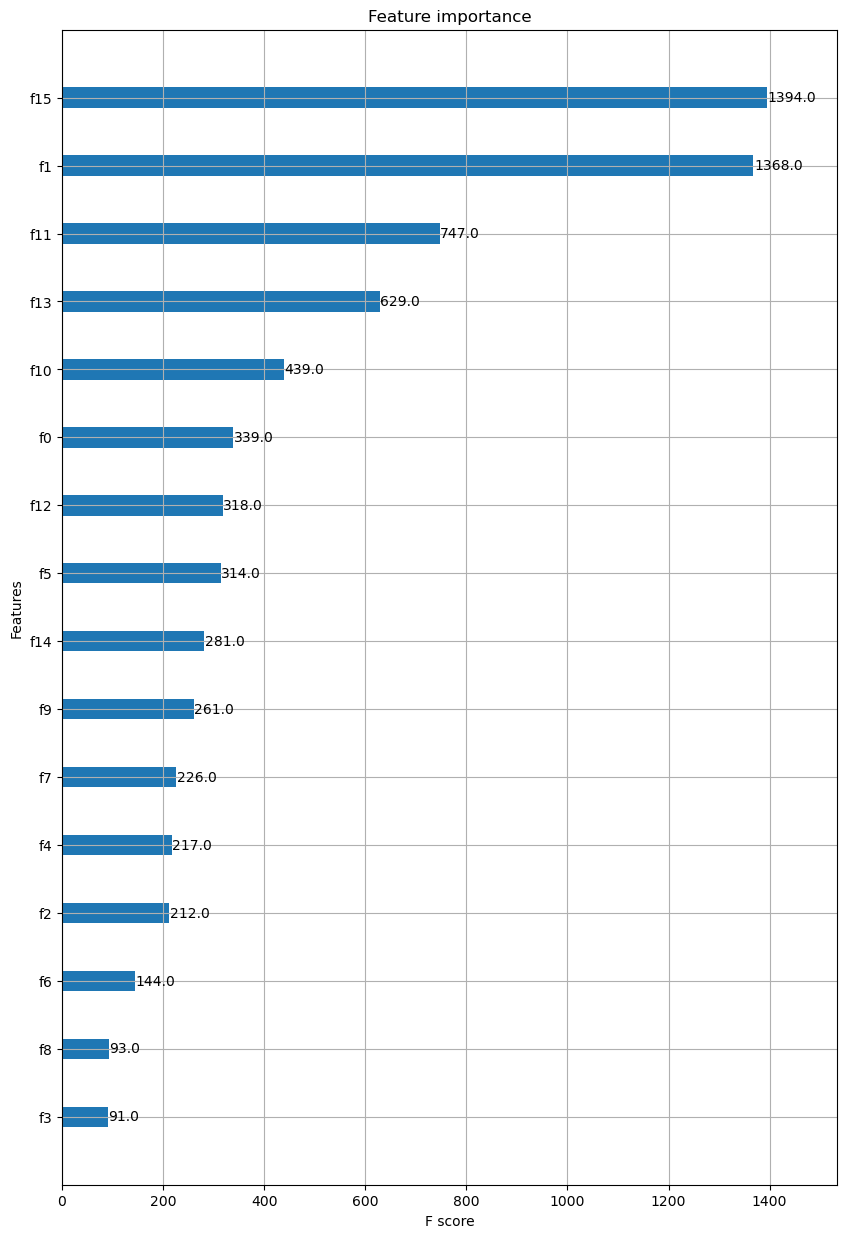

In [62]:
fig,ax = plt.subplots(figsize=(10,15))
xgb.plot_importance(bst,height=0.3,ax=ax,max_num_features=50)
plt.show()

In [63]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0} \t {1} \t q \n'.format(i, feat))
        i = i + 1
    outfile.close()

In [64]:
import operator
features = pd.DataFrame(xtrain_new).columns
pd.DataFrame(xtrain_new).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.074895,2.301527,-0.859275,-0.478518,-0.156553,1.719443,0.918723,-0.438027,-0.071868,0.568461,-0.585884,0.722192,-0.417453,1.213822,0.404147,-0.051385
1,-0.324777,-0.278212,1.132097,-0.478518,-0.156553,2.277866,0.918723,-1.711073,-0.071868,1.057616,0.848203,-1.603536,-0.048423,-0.739422,1.155102,-0.051457
2,-1.724450,-1.396099,-0.859275,-0.478518,-0.156553,1.161019,0.918723,0.835019,-0.071868,-0.899005,1.630432,0.039641,-0.417453,1.213822,-0.346807,-0.050117
3,1.074895,-0.880151,-0.859275,-0.478518,-0.156553,-0.514250,-0.687952,0.835019,-0.071868,-0.899005,-0.585884,0.722192,-0.786482,1.213822,-0.346807,-0.046061
4,-0.324777,-0.278212,1.132097,-0.478518,-0.156553,-0.514250,-0.687952,0.835019,-0.071868,1.057616,0.848203,-1.603536,0.689636,-1.187708,1.530579,-0.037442


In [65]:
ceate_feature_map(features)
 
importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
 
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
df.to_csv("../data/feat_importance.csv", index=False)

In [66]:
# select the most important n features
df_selected=df.head(300)
data_index = df_selected['feature'].tolist()
feature_index = []
for index in data_index:
    int_index = int(index)
    feature_index.append(int_index)
print(feature_index)

[15, 1, 11, 13, 10, 0, 12, 5, 14, 9, 7, 4, 2, 6, 8, 3]


In [67]:
# Load and preprocess the test data
test_data = pd.read_csv("../data/test_users.csv")
most_frequent_actions = pd.read_csv("../data/most_frequent_actions.csv")

# Merging
test_data = test_data.merge(most_frequent_actions, left_on='id', right_on='user_id', how='inner')

# Cleaning
test_data = test_data[['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'most_frequent_action', 'most_frequent_action_type',
       'most_frequent_action_detail', 'most_frequent_device_type',
       'most_frequent_secs_elapsed']]

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])
test_data['signup_method'] = label_encoder.fit_transform(test_data['signup_method'])
test_data['language'] = label_encoder.fit_transform(test_data['language'])
test_data['affiliate_channel'] = label_encoder.fit_transform(test_data['affiliate_channel'])
test_data['signup_app'] = label_encoder.fit_transform(test_data['signup_app'])
test_data['first_device_type'] = label_encoder.fit_transform(test_data['first_device_type'])
test_data['first_browser'] = label_encoder.fit_transform(test_data['first_browser'])

test_data['most_frequent_action'] = label_encoder.fit_transform(test_data['most_frequent_action'])
test_data['most_frequent_action_type'] = label_encoder.fit_transform(test_data['most_frequent_action_type'])
test_data['most_frequent_action_detail'] = label_encoder.fit_transform(test_data['most_frequent_action_detail'])
test_data['most_frequent_device_type'] = label_encoder.fit_transform(test_data['most_frequent_device_type'])

test_data['affiliate_provider'] = label_encoder.fit_transform(test_data['affiliate_provider'])
test_data['first_affiliate_tracked'] = label_encoder.fit_transform(test_data['first_affiliate_tracked'])
# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [69]:
# Calculate the mode of the column
mode_value = test_data['age'].value_counts().idxmax()

# Impute missing values with the mode
test_data['age'] = test_data['age'].fillna(mode_value)

In [70]:
#Checking null values
test_data.isnull().sum()

gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
most_frequent_action           0
most_frequent_action_type      0
most_frequent_action_detail    0
most_frequent_device_type      0
most_frequent_secs_elapsed     0
dtype: int64

In [71]:
test_data = test_data.dropna()

In [72]:
test_data.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,most_frequent_action,most_frequent_action_type,most_frequent_action_detail,most_frequent_device_type,most_frequent_secs_elapsed
0,1,35.0,1,0,6,1,4,6,1,8,17,109,2,81,0,79.0
1,0,28.0,0,0,6,1,4,6,1,8,17,41,8,22,0,95.0
2,0,28.0,0,0,6,1,4,0,2,6,5,110,2,81,9,768.0
3,0,28.0,0,0,6,1,4,0,2,6,11,87,3,83,9,5.0
4,0,28.0,0,0,6,1,4,6,2,3,23,104,8,50,6,0.0


In [73]:
feature_index

[15, 1, 11, 13, 10, 0, 12, 5, 14, 9, 7, 4, 2, 6, 8, 3]

In [74]:
xtrain_v4 = xtrain.iloc[:, feature_index]
xtest_v4 = test_data.iloc[:, feature_index]
xtrain_v4.to_csv("../data/Airbnb_xtrain_v5.csv")
xtest_v4.to_csv("../data/Airbnb_xtest_v5.csv")

In [75]:
xtrain_v4.head()

,most_frequent_secs_elapsed,age,most_frequent_action,most_frequent_action_detail,first_browser,gender,most_frequent_action_type,affiliate_channel,most_frequent_device_type,first_device_type,first_affiliate_tracked,language,signup_method,affiliate_provider,signup_app,signup_flow
0,2.0,62,114,75,6,2,3,6,8,6,3,5,0,7,2,0
1,0.0,32,22,14,17,1,4,7,10,7,0,5,1,7,2,0
2,37.0,19,87,75,23,0,3,5,6,3,6,5,0,7,2,0
3,149.0,25,114,75,6,2,2,2,6,3,6,5,0,3,2,0
4,387.0,32,22,0,17,1,6,2,11,7,6,5,1,3,2,0
